<a href="https://colab.research.google.com/github/zpren1998/2014-2018-Maryland-Family-Income-Change-and-Public-School-Enrollment/blob/main/2014_2018_Maryland_Income_%26_School_Enrollment_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2014-2018 Maryland Income & School Enrollment Study

Aims: 
* Study the income change and income distrbution change from 2014 to 2018 in Maryland and counties. 
* Analyze the relationship between public school enrollment and family income change in Maryland. 


## Import library

In [ ]:
# for data analysis
import pandas as pd
import numpy as np
from numpy import ptp
# for data visualization
import plotly.express as px
from plotly.subplots import make_subplots # this will be important when combining charts
import plotly.figure_factory as ff # this will be to make density charts
import matplotlib as mpl
import matplotlib.pyplot as plt
# exporting files
from google.colab import files

## Import data

In [ ]:
# Import merged MD household income data 2014-2020
df_mdfin = pd.read_csv("https://raw.githubusercontent.com/zpren1998/2014-2018-Maryland-Family-Income-Change-and-Public-School-Enrollment/main/Maryland_Family_Income_2014-2020.csv")
# Import median income data in MD counties 2010-2018
df_mdcin = pd.read_csv("https://raw.githubusercontent.com/zpren1998/2014-2018-Maryland-Family-Income-Change-and-Public-School-Enrollment/main/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2010-2018.csv")
# Import public school enrollment in MD counties
df_mdenroll = pd.read_csv("https://raw.githubusercontent.com/zpren1998/2014-2018-Maryland-Family-Income-Change-and-Public-School-Enrollment/main/Maryland_Public_School_Enrollment_Trends__Pre-Kindergarten_to_Grade_12__2009-2019.csv",thousands=",")
# Import MD population data in counties 2019-2019
df_mdpop = pd.read_csv("https://raw.githubusercontent.com/zpren1998/2014-2018-Maryland-Family-Income-Change-and-Public-School-Enrollment/main/Population_Estimates_2010-2019.csv",thousands=",")

## Population analysis of MD counties

In [ ]:
# Graph the population change from 2014 to 2018
# Filter the population from 2014-2018
df_mdpop_14_18 = df_mdpop[["Year","2014","2015","2016","2017","2018"]]

In [ ]:
# Picking out the counties with top 10 population from 2014 to 2018
df_mdpop = df_mdpop.sort_values(by = "2018",ascending=False)
df_mdpop.head(10)

,Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
15,Montgomery County,975602,991185,1005079,1015172,1024617,1032814,1038846,1046822,1048478,1050688
16,Prince George's County,866419,874389,882490,890658,899686,906197,908501,909705,909619,909327
3,Baltimore County,806656,812961,818113,822274,824994,827533,828682,828645,827859,827370
2,Baltimore City,620915,620410,622895,622391,623587,622522,616226,610481,602443,593490
1,Anne Arundel County,539284,544803,550333,555417,559142,563027,567254,571339,575523,579234
13,Howard County,288627,293583,299184,303527,306909,311297,315416,319251,322621,325690
10,Frederick County,234218,237284,239645,241129,243381,245001,246999,250622,254943,259547
12,Harford County,245237,246729,248566,248890,249314,249558,250370,251858,253882,255441
6,Carroll County,167213,167037,167049,167217,167327,167132,167100,167547,168267,168447
8,Charles County,147159,149200,150668,152645,154359,155665,157292,159450,161476,163257


The top 10 counties are shown above. The ratio of population of these counties will be calculated to show validity.

In [ ]:
# Estimate the ratio of the population in the top 10 counties (take 2018 as example)
pc = sum(df_mdpop["2018"][0:10])/sum(df_mdpop["2018"])
pc

0.8491184767161016

The counties with top 10 populations make up 85.0% of total MD population

## Family income change in counties with top 10 population

In [ ]:
# Filter MD counties income data
df_mdcin = df_mdcin[(df_mdcin["Data"] != "MOE")]

In [ ]:
# Filter the income from 2014 to 2018
df_mdcin_14_18 = df_mdcin.iloc[4:9]

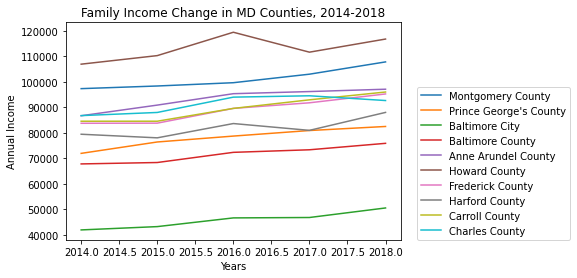

In [ ]:
# Line chart of MD counties family income
# As the previous section showed, counties with top 10 counties 
plt.title("Family Income Change in MD Counties, 2014-2018")
plt.xlabel("Years")
plt.ylabel("Annual Income")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Montgomery County"],label="Montgomery County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Prince George's County"],label="Prince George's County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Baltimore City"],label="Baltimore City")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Baltimore County"],label="Baltimore County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Anne Arundel County"],label="Anne Arundel County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Howard County"],label="Howard County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Frederick County"],label="Frederick County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Harford County"],label="Harford County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Carroll County"],label="Carroll County")
plt.plot(df_mdcin_14_18["Year"],df_mdcin_14_18["Charles County"],label="Charles County")
plt.legend(bbox_to_anchor=(1.05,0),loc=3,borderaxespad=0)
plt.show()

Generally, annual income in the top 10 counties are increasing from 2014 to 2018. 

In [ ]:
# Analyze the family income range change in MD 2014-2018
# Download the file as csv and calculate range in EXCEL
df_mdcin_14_18.to_csv("Family_income_in_MD_counties_2014-2018.csv")
files.download("Family_income_in_MD_counties_2014-2018.csv")

## Maryland public school enrollment in counties with top 10 population

In [ ]:
# Filter out the public school enrollment data for 2014-2018 and sort by grades
df_mdenroll_14_18 = df_mdenroll.loc[20:39,["Grades","Year","Montgomery County","Prince George's County","Baltimore City","Baltimore County","Anne Arundel County","Howard County","Frederick County","Harford County","Carroll County","Charles County"]]
df_mdenroll_14_18 = df_mdenroll_14_18.sort_values(by = ["Grades","Year"])

In [ ]:
# Visualize the enrollment data of different grades
# Data visualization will be done in EXCEL
df_mdenroll_14_18.to_csv("Public_School_Enrollment_in_MD_counties_2014-2018.csv")
files.download("Public_School_Enrollment_in_MD_counties_2014-2018.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>